# AbAg_Affinity dataset

This notebook generates a dataframe containing information about data first version of the Antibody-Antigen_complexes dataset:

- Overlap of AbDb data (filtered and enriched abag data) with SAbDab data (affinity values for conformtions) 

In [1]:
import os
import pandas as pd
from abag_affinity.utils.config import read_config, get_data_paths
import matplotlib.pyplot as plt
import seaborn as sns

config = read_config("../../config.yaml")
summary_path = os.path.join(config["DATASETS"]["path"], config["DATASETS"]["abag_affinity"]["folder_path"], config["DATASETS"]["abag_affinity"]["summary"])

In [2]:
summary_df = pd.read_csv(summary_path, index_col=0)
summary_df["validation"] = summary_df["validation"].astype(str).apply(lambda x: x.split(".")[0] if x != "nan" else "0")
summary_df.head()

,pdb,filename,chain_infos,-log(Kd),delta_g,validation
1bj1,1bj1,1bj1.pdb,"{'h': 0, 'l': 0, 'v': 1}",8.468521,-11.55,1
1bvk,1bvk,1bvk.pdb,"{'h': 0, 'l': 0, 'f': 1}",7.853872,-10.53,3
1cz8,1cz8,1cz8.pdb,"{'h': 0, 'l': 0, 'v': 1}",9.958607,-14.12,1
1dqj,1dqj,1dqj.pdb,"{'h': 0, 'l': 0, 'c': 1}",8.543634,-11.45,1
1e6j,1e6j,1e6j.pdb,"{'h': 0, 'l': 0, 'p': 1}",7.537602,-10.28,2


In [3]:
print(f"Total lenght of AbAg-Affinity dataset = {len(summary_df)}")

Total lenght of AbAg-Affinity dataset = 447


In [4]:
summary_df.groupby("validation")["pdb"].count()

validation
1    158
2    148
3    141
Name: pdb, dtype: int64

## Affinity distribution

### Delta G analysis

In [5]:
summary_df["delta_g"].describe()

count    432.000000
mean     -11.295250
std        1.954144
min      -16.056540
25%      -12.431601
50%      -11.232654
75%      -10.047310
max       -5.040000
Name: delta_g, dtype: float64

<AxesSubplot:xlabel='delta_g', ylabel='Count'>

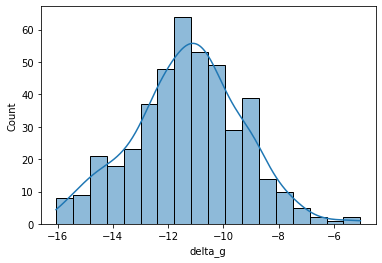

In [6]:
sns.histplot(summary_df, x="delta_g", kde=True)

<AxesSubplot:xlabel='delta_g', ylabel='Count'>

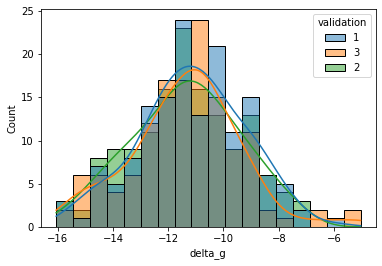

In [7]:
summary_df.loc[summary_df["validation"] == 3, "validation"] = 2 # only compare to validation set 1 for now
sns.histplot(summary_df, x="delta_g", hue="validation", kde=True)

## -log(Kg) Analyis

In [8]:
summary_df["-log(Kd)"].describe()

count    447.000000
mean       8.208516
std        1.463241
min        3.698970
25%        7.253104
50%        8.187087
75%        9.095557
max       11.769551
Name: -log(Kd), dtype: float64

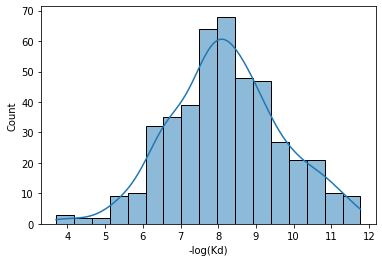

In [9]:
sns.histplot(summary_df, x="-log(Kd)", kde=True)
plt.savefig("./plots/abag_affinity_-log(Kd)_distribution.png")

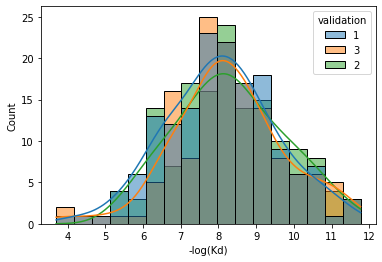

In [10]:
sns.histplot(summary_df, x="-log(Kd)", hue="validation", kde=True)
plt.savefig("./plots/abag_affinity_-log(Kd)_distribution_by_val_set.png")